__Double-click to write your name here__
<br>
Due date: Apr. 2, 2024, 11:59pm
<br>
PHYS 2030 W24

# <center><font color=#46769B>Exercise 11: Signal processing</font></center>

# <center><font color=#46769B>Homework assignment 10</font></center>

__Rubric (100 points total)__:

- Problem 1a - __10 points__

- Problem 1b - __30 points__

- Problem 2a - __20 points__

- Problem 2b - __20 points__

- Problem 2c - __20 points__


</font>

The goals of this exercise are:

- Learn about spectrograms

- Gain familiarity with `scipy.signal` library

- Gain familiarity with inverse DFT and filtering

Required reading:

- *Lesson 11: Discrete Fourier Transform*


## <font color=#46769B>Problem 1: Spectrograms</font>

### <font color=#46769B>Introduction</font>

Discrete Fourier Transform (DFT) allows us to work in the frequency domain to identify periodic signals in data samples. However, if we take the DFT over the entire time interval, this is at the expense of obscuring any time information in the data. In some situations, we wish to consider *both* time and frequency information. Music is an example: we would want to know not only which frequencies (notes) arise, but also *when* they occur.

The solution to this problem is known as __Short-time Fourier Transform__. Suppose our full time interval of our samples spans the range $[t_0,t_f]$. The strategy is:

- Divide your full samples into $Q$ smaller segments, each spanning a small time interval. For example:
$$[t_0,t_1], \quad [t_1, t_2], \quad [t_2,t_3] , \quad ... , \quad [t_{Q-1},t_Q]\, ,$$
where $t_Q = t_f$ is the final time. If there are $N$ total samples, then we have $M = N/Q$ samples for each segment. (We choose $q$ such that $M$ is an integer.)

- For each segment, take the DFT to calculate the Fourier coefficients $c_k$ and compute the power spectrum $|c_k|^2$.

- After looping through all the time segments, we now have a 2D $Q \times M$ array containing all the power spectra as a function of time (i.e., for each time segment in succession). This 2D array is the __spectrogram__.

The spectrogram is often visualized using a heatmap plot, with time plotted on the $x$-axis and frequency plotted on the $y$-axis, with brighter colors indicating where there is more power at a given frequency and time. 

There is a wonderful online tool you can explore [here](https://musiclab.chromeexperiments.com/spectrogram/). Playing around with this will give you a great idea of what a spectrogram is (though the spectrograms we will create will not be animations).

There is a trade-off between frequency and time:

- If we want high resolution in time, we want many small segments to be sensitive to rapid variations on small time scales. However, the number of samples per segment is also small, which limits the number of frequencies that can be accessed.

- If we want high resolution in frequency, we want larger segments to have more frequencies available, which implies that the time-resolution will be coarser.

This limitation is familiar from the Heisenberg Uncertainty Principle (referred to as the __Gabor limit__ in signal processing). 

In this problem, you will take a sound file of a [flute playing an F-major scale](https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/blob/main/data/flute-f-major.wav?raw=true) (attribution: <a href="https://freesound.org/people/MTG/sounds/355023/">MTG</a>). 

Run the following cell, which does the following:

- Load this file and save the sound wave as a `numpy.array`, which will provide our samples $f_n$ (time series data). Loading the sound file also yields the sampling rate, $h^{-1}$, which is inversely related to the step size $h$. With $h$, we can extract the sampling times $t_n$. 

- Make a plot our time series data (or samples) vs the sampling times.




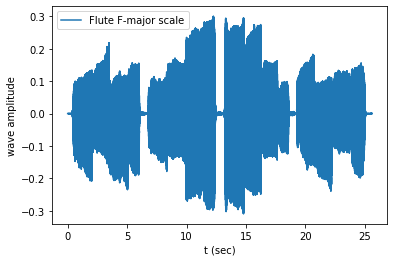

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

import urllib.request
import soundfile

path = "https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/blob/main/data/flute-f-major.wav?raw=true"
tmp_file = urllib.request.urlretrieve(path)[0]
data, sample_rate = soundfile.read(tmp_file)

fn = data
N = len(fn)
tn = np.array(range(N))/sample_rate

plt.plot(tn,fn,label='Flute F-major scale')
plt.xlabel('t (sec)')
plt.ylabel('wave amplitude')
plt.legend(loc='upper left')
plt.show()

The `scipy.signal` library has lots of built-in functions related to signal processing. We will explore some of them in this exercise. There is `scipy.signal.spectrogram()` that can automatically calculate the spectrogram. Here is how it [works](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html#scipy.signal.spectrogram).

First, we calculate the spectrogram. The inputs here are:

- The samples `fn` and the sampling rate $h^{-1}$.

- `nperseg` is the number of samples per segment, which I labeled as $M$ above.

- The [window function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html#scipy.signal.get_window) used for calculating the Fourier coefficients. Below I used the *Hann* window function.

- `noverlap` is the number of overlapping samples from one segment to the next. In the logic I sketched above, I began one segment where the previous segment ended. But this is not required: segments can overlap. However, I neglect overlap here by taking `noverlap=0`.

The outputs are: 

- The frequencies, $\nu_k$, for each corresponding Fourier mode.

- The segment times (the mean time for each segment)

- The power spectrum as a function of frequency and time.

Next, we make the plot using `matplotlib.pyplot.pcolormesh` to make a heatmap plot. Some points that are useful:

- I plot the log (base 10) of the power, not the power itself. This helps visualize powers that vary by orders of magnitude from each other.

- The keywords `vmin` and `vmax` allow you to adjust the lower and upper scale of the color. Values below `vmin` will be completely dark and values above `vmax` will be saturated.

In this example, I take $M=4800$ by setting `nperseg=4800`. This value was chosen to cleanly divide the total number of samples $N$, but `signal.spectrogram` is smart enough to handle any value. In this data $N=1228800$, so $Q=1228800/4800=256$ is the number of time values in the spectrogram.

Feel free to play around with the different parameters here. Adjust `nperseg` to be smaller or larger and see what the effect is. If you have larger `nperseg`, then you get better resolution in frequency but worse resolution in time. Smaller `nperseg` is the opposite.

Listen to the sound file as you stare at the spectrogram. The steps going up and down are the notes going up and down. Note there are multiple sets of steps since each flute note consists of a fundamental frequency (the lowest note) and higher harmonics which are integer multiples of that frequency (see Exercise 11).



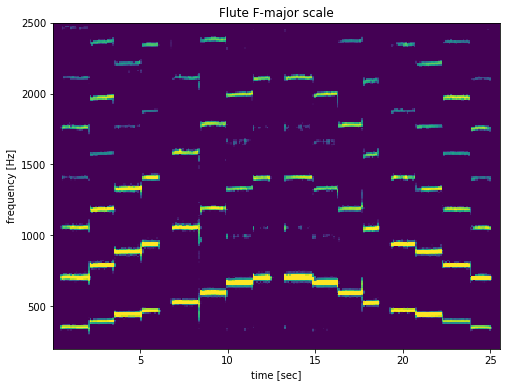

In [2]:
# Here is one line of code to calculate the spectrogram

freq, time, power_spec = signal.spectrogram(fn, sample_rate, nperseg=4800, window='hann', noverlap=0)

# Plot the spectrogram
plt.figure(figsize=(8,6))

plt.pcolormesh(time, freq, np.log10(power_spec), vmin=-7.5, vmax=-4.5)

plt.ylabel('frequency [Hz]')
plt.xlabel('time [sec]')
plt.ylim([200,2500])
plt.title('Flute F-major scale')
plt.show()

### <font color=#46769B>Part (a) </font>

Generate the same spectrogram as above but with a *rectangular window function*. You should see evidence for spectral leakage. (Hint: look in the `scipy.signal` documentation to see how to implement this window function.)

In [1]:
# Your code for part (a) here

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import urllib.request
import soundfile

# Load the sound file
path = "https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/blob/main/data/flute-f-major.wav?raw=true"
tmp_file = urllib.request.urlretrieve(path)[0]
data, sample_rate = soundfile.read(tmp_file)

# Data setup
fn = data
nperseg = 4800  # Number of samples per segment

# Calculate the spectrogram with a rectangular window function
freq, time, power_spec = signal.spectrogram(fn, sample_rate, nperseg=nperseg, window='boxcar', noverlap=0)

# Plot the spectrogram
plt.figure(figsize=(8,6))
plt.pcolormesh(time, freq, np.log10(power_spec), vmin=-7.5, vmax=-4.5)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([200, 2500])
plt.title('Flute F-major scale with Rectangular Window')
plt.show()


ModuleNotFoundError: No module named 'soundfile'

### <font color=#46769B>Part (b) </font>

Write *your own code* to generate the same spectrogram plot as above (for the Hann window function) *without* using `scipy.signal.spectrogram`. 

*Do not* use the brute force method for calculating the DFT. Running that code will take a long time (I tried it). 

*Instead* use the following approach:

- Divide your time series samples `fn` into 256 segments, each of length $M=4800$.

- For each segment, calculate the power spectrum using the built-in function `scipy.signal.periodogram`, documented [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.periodogram.html).

- Loop over all segments and put all the power-spectra together in a 2D array. You will also have to calculate the mean time for each segment, as well as the corresponding Fourier frequencies for a segment. (Note that the frequencies are the same for each segment since each segment has the same number of samples and the same sampling frequency.)

- Make a plot, which should agree with the one shown above.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import urllib.request
import soundfile

# Load the sound file
path = "https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/blob/main/data/flute-f-major.wav?raw=true"
tmp_file = urllib.request.urlretrieve(path)[0]
data, sample_rate = soundfile.read(tmp_file)

# Variables
fn = data
N = len(fn)  # Total number of samples
Q = 256  # Number of segments
M = N // Q  # Number of samples per segment

# Pre-allocate arrays for the spectrogram data
power_spectra = np.zeros((M // 2 + 1, Q))  # +1 because periodogram returns M//2+1 frequencies
segment_times = np.zeros(Q)

# Calculate the spectrogram
for q in range(Q):
    segment = fn[q * M:(q + 1) * M]  # Extract segment
    freq, Pxx = signal.periodogram(segment, sample_rate, 'hann', scaling='spectrum', nfft=M)
    power_spectra[:, q] = Pxx
    segment_times[q] = (q + 0.5) * M / sample_rate  # Mean time of the segment

# Plotting
plt.figure(figsize=(8, 6))
plt.pcolormesh(segment_times, freq, np.log10(power_spectra), vmin=-7.5, vmax=-4.5)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([200, 2500])
plt.title('Flute F-major scale with Hann Window')
plt.show()



## <font color=#46769B>Problem 2: Filtering</font>

### <font color=#46769B>Introduction</font>

The original motivation for DFT followed from Fourier series for a continuous function $f(t)$ (defined over the interval $0 \le t < T$):

$$f(t) = \sum_{k=-\infty}^\infty c_k e^{i \omega_k t} \qquad {\rm (1a)}  $$

$$c_k = \frac{1}{T} \int_0^T dt \, f(t) \, e^{-i \omega_k t} \qquad {\rm (1b)}$$

where $\omega_k = 2\pi k/T$. These expressions represent operations where one can convert from the time domain, $f(t)$, to the frequency domain, $c_k$, and vice-versa. Next, we considered how these results could be applied to numerical signals, where the function $f(t)$ is only known by its samples $f_n = f(t_n)$ at discrete (and evenly-spaced) sampling times $t_n$. 

In this case, Eq. (1b) becomes the Dicrete Fourier Transform (DFT)

$$c_k = \frac{1}{N} \sum_{n=0}^{N-1} f_n \, e^{- 2\pi i k n/N} \qquad {\rm (2)}$$ 

for converting time-domain signals into Fourier coefficients in the frequency domain. However, we also have an operation for going the other direction, i.e., for converting the frequency-domain Fourier coefficients to samples $f_n$ in the time domain. This follows from Eq. (1a), taking $t = t_n = n h$. We have the __Inverse Discrete Fourier Transform__ (IDFT):

$$f_n = \sum_{k=0}^{N-1} c_k \, e^{2\pi i k n/N} \qquad {\rm (3)}$$

Note that the sum now only covers the values of $k = 0, ..., N-1$ due to the periodicity of the Fourier coefficients $c_k$. Eqs. (3) and (2) are the discrete analogs of Eqs. (1). One can prove mathematically that the subsequent operations of DFT then IDFT yield back the original samples, but we do not prove it here.

We can implement a (slow) brute force approach for calculating the IDFT as follows:
```py
def IDFT(ck):
    # Calculate N automatically from number of samples
    N = len(ck)
    
    # Initialize empty array to save samples fn
    # Note want fn to be complex in general and we need to tell numpy this explicitly up front
    fn = np.zeros(N,dtype = 'complex')
    
    # Need to define values k = [0,1,2,...,N-1]
    k = np.array(range(N))
        
    # Calculate coefficients fn by looping through n
    for n in range(N):

        # Note fn and n are numpy arrays, so we are calculating 
        # all N terms at once and then summing over them
        fn[n] = np.sum( ck * np.exp(2j*np.pi*k*n/N) ) 
        
    return fn
```
The algorithm is nearly identical to that for the DFT, so it may not surprise you that there is an FFT implementation of the IDFT as well. This is done in `scipy.fft.ifft()` (see documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.ifft.html)). This function can be called as `fft.ifft(ck,norm='forward')`, where as discussed in Lesson 11 we need an extra keyword `norm=forward` to agree with our conventions. (Also we need the import statement `from scipy import fft` beforehand.)

The idea of __signal processing__ is that we can apply a tranformation of some kind *before* applying the DFT or IDFT. Two types of transformations are:

- __Windowing__: We take our samples $f_n$ and apply a window function $w_n$ of some kind before taking the DFT. That is, we take the DFT of the product `fn*wn`. Short-time Fourier Transform is also a form of windowing, i.e., selecting out a subset of the full interval of the data is akin to applying a window function that is nonzero only over that subinterval.

- __Filtering__: We take our Fourier coefficients $c_k$ and apply a transformation $g_k$ before taking the IDFT. That is, we take the IDFT of the product `ck*gk` instead of `ck` by itself. The quantity $g_k$ represents the __gain__ of a filter, which depends on the Fourier mode $k$ and therefore is a function of frequency $\nu_k$. The goal of filtering is to eliminate some frequencies from the data (e.g., due to background noise) and leave only the frequencies of the signal of interest.

In this Exercise, we will consider filtering. There are different types of filters:

- __High-pass filter__: Allows only frequencies satisfying $|\nu_k| > \nu_{\rm min}$.

- __Low-pass filter__: Allows only frequencies satisfying $|\nu_k| < \nu_{\rm max}$.

- __Bandpass filter__: Allows only frequencies within a given range (band), satisfying $\nu_{\rm min} < |\nu_k| < \nu_{\rm max}$.

- __Bandstop filter__ (also known as a __notch filter__): *Excludes* frequencies in a given range between $\nu_{\rm min} - \nu_{\rm max}$, that is, by allowing only frequencies satisfying $|\nu_k| < \nu_{\rm min}$ *or* $|\nu_k| > \nu_{\rm max}$. This is useful when there is a background signal at a particular frequency.

We will only consider __ideal filters__. The basic idea is that you set Fourier coefficients $c_k$ to zero if the corresponding frequency $\nu_k$ is one that you wish to exclude from the data. That is, 

$$g_k = \left\{ \begin{array}{cc} 1 & {\rm some \; condition \; is \; satisfied} \\ 0 & {\rm otherwise} \end{array}\right.$$

As an example, a high-pass filter allowing only frequencies above 100 could be implemented by the following code
```py
# Usual steps of calculating Fourier coefficients and frequencies
ck = DFT(fn)
nu_k = np.where( k < N/2, k*nu_s/N, (N-k)*nu_s/N )

# Calculate gain 
nu_min = 100
gk = np.where( np.abs(nu_k) > nu_min, 1, 0)

# Inverse DFT
fn_filt = IDFT(ck*gk)
```
Note that this only works if one defines the frequencies $\nu_k$ with the convention including positive and negative frequencies, so be sure to do that.

In this Problem, you will consider three ideal filters acting on your time-series data from Problem 1. In each case, you will generate a new sound file after applying your filter. Take a listen to see how your signal processing affects the sound in each case.

### <font color=#46769B>Part (a)</font>

Taking the same time series data from Problem 1, your task is as follows:

- Take the DFT of these samples `fn` to obtain the Fourier coefficients `ck`.

- Apply an ideal low-pass filter to retain frequencies $|\nu_k| < 650 \; {\rm Hz}$.

- Apply the IDFT to the filtered Fourier coefficients to obtain a new time series of samples, `fn_filt`.

- Use the following line of code
```py
soundfile.write('lowpass.wav', fn_filt, sample_rate)
```
to generate a new sound file with only low frequencies.

Note: You *do not* need to save your sound files in your Github repository. They will be automatically generated by the TA when grading your exercise.


In [5]:
# Your code for Part (a)

## <font color=#46769B>Part (b)</font>

Repeat Part (a) with an ideal high-pass filter, retaining frequencies $|\nu_k| > 1200 \; {\rm Hz}$. Use the following line of code
```py
soundfile.write('highpass.wav', fn_filt, sample_rate)
```
to generate a new sound file with only high frequencies.

In [6]:
# Your code here

## <font color=#46769B>Part (c)</font>

Repeat the steps Part (a) and (b) with a bandpass filter, retaining frequencies $650 \; {\rm Hz} < |\nu_k| < 1200 \; {\rm Hz}$. 

Use the following line of code
```py
soundfile.write('bandpass.wav', fn_filt, sample_rate)
```
to generate a new sound file with only medium frequencies.

In [7]:
# Your code here